# Supervised Machine Learning

Impoerting the Libraries and Dataframe

In [39]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy
import matplotlib.ticker as ticker
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

In [41]:
#creating the path
path = r'C:\Users\graha\Desktop\Career foundry\Chapter 6\Wind Turbine Scada'

In [42]:
#Loading the Data Frame
df_gwt = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'German_wind_turbines_cleaned.csv'))

In [43]:
df_gwt.describe()

,Postal Code,Longitude,Latitude,Gross Performance,Net Rated Power,Hub Height,Rotor Diameter,Sea Location,ClusterNordsee,Water Depth,Distance From Coastline,ClusterOstsee
count,32700.000000,33589.000000,33589.000000,34484.000000,34484.000000,33631.000000,34031.000000,1784.000000,1476.000000,1650.000000,1650.000000,308.000000
mean,35292.541040,9.955909,52.301782,2370.309200,2370.309200,98.725831,87.096264,639.827354,1595.292683,29.761380,38.646573,1541.081169
std,23265.922882,2.310599,1.542561,1681.910702,1681.910702,34.785787,35.863944,0.378047,250.848277,7.603801,15.178974,1.047676
min,1067.000000,-3.622044,46.092507,0.120000,0.120000,0.360000,0.300000,639.000000,1546.000000,1.320000,6.495000,1540.000000
25%,18337.000000,8.067731,51.333111,1500.000000,1500.000000,70.000000,66.000000,640.000000,1548.000000,24.095500,29.345000,1540.000000
50%,27374.000000,9.472613,52.387225,2000.000000,2000.000000,98.000000,82.000000,640.000000,1549.000000,28.860000,33.970000,1541.000000
75%,48565.000000,11.846566,53.504233,3050.000000,3050.000000,134.000000,115.000000,640.000000,1551.000000,38.600000,53.197500,1542.000000
max,99996.000000,16.593999,60.003844,20000.000000,20000.000000,200.000000,200.000000,640.000000,2963.000000,60.810000,66.510000,1543.000000


In [44]:
df_gwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34484 entries, 0 to 34483
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     34484 non-null  object 
 1   State                       34484 non-null  object 
 2   District                    32700 non-null  object 
 3   Postal Code                 32700 non-null  float64
 4   location                    32700 non-null  object 
 5   Longitude                   33589 non-null  float64
 6   Latitude                    33589 non-null  float64
 7   Commissioning Date          32020 non-null  object 
 8   Unit Operation Status       34484 non-null  object 
 9   Gross Performance           34484 non-null  float64
 10  Net Rated Power             34484 non-null  float64
 11  Name of Windpark            33674 non-null  object 
 12  Position                    34484 non-null  object 
 13  Manufacturer                340

In [45]:
df_gwt.shape

(34484, 24)

In [46]:
df_gwt.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34479    False
34480    False
34481    False
34482    False
34483    False
Length: 34484, dtype: bool

In [47]:
df_gwt.isnull().sum()

Country                           0
State                             0
District                       1784
Postal Code                    1784
location                       1784
Longitude                       895
Latitude                        895
Commissioning Date             2464
Unit Operation Status             0
Gross Performance                 0
Net Rated Power                   0
Name of Windpark                810
Position                          0
Manufacturer                    449
Technology                        0
Type Design                     464
Hub Height                      853
Rotor Diameter                  453
Planned Commissioning Dtae    32021
Sea Location                  32700
ClusterNordsee                33008
Water Depth                   32834
Distance From Coastline       32834
ClusterOstsee                 34176
dtype: int64

# Cleaning the Data

For the columns we plan to use namely Gross Performance, Net Rated Power, Hub Height, and Rotor Diameter. The nan are few enough that we can ignore them. the reason for them is most likely that the turbines havenet been built yet or they have been decomssioned. as the database is updated this will change. i may filter them out later in the proccess.

### Checking for extreme values

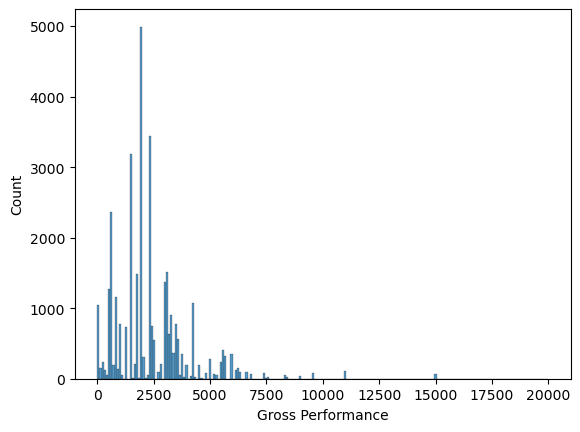

In [48]:
hist_GP = sns.histplot(df_gwt['Gross Performance'])

The outliers we see towrds the end of thr gross performance are due to newer projects that produce much more power

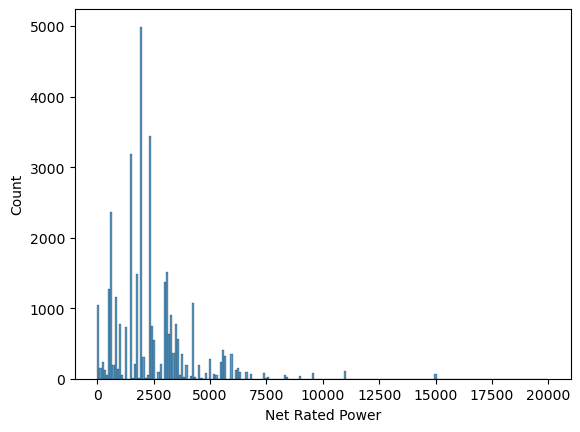

In [49]:
hist_NRP = sns.histplot(df_gwt['Net Rated Power'])

we see the same graph here because the maximum power generating potential of the turbines is the same as the maximum potenial power output of the turbine.

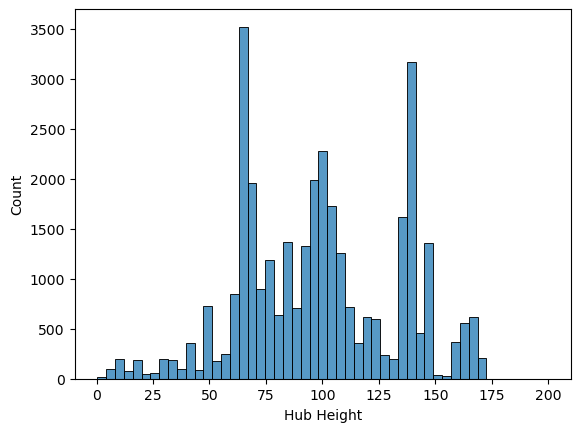

In [50]:
hist_HH = sns.histplot(df_gwt['Hub Height'])

there are no outliers here they are all within acceptable tolerances.

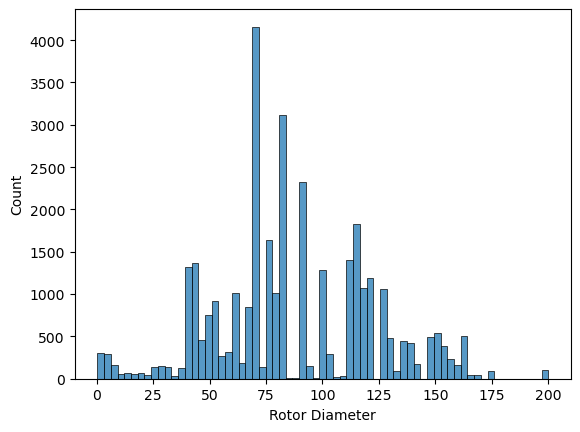

In [51]:
hist_RD = sns.histplot(df_gwt['Rotor Diameter'])

again we see all accptable tolerance here

# exploring relationships

In [54]:
%matplotlib inline

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


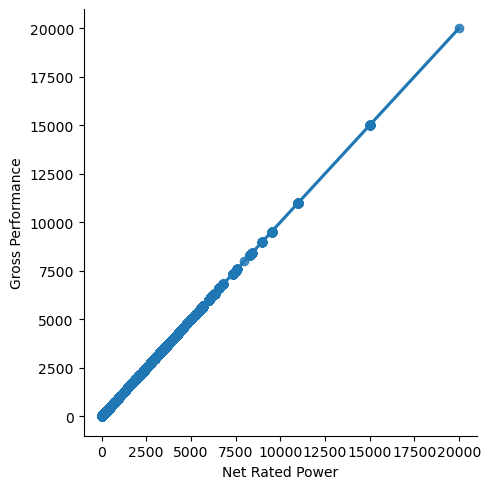

In [63]:
#Gross Perfomance / Net Rated Power
scatter_GP = sns.lmplot(data=df_gwt, x="Net Rated Power", y="Gross Performance")

We can see that there is a 100% match which makes sense as the data is the same just for different aspects of the turbine

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


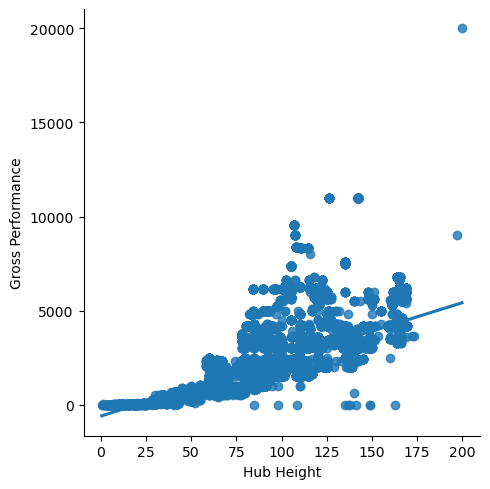

In [62]:
# Gross Performance / Hub Height
scatter_HH = sns.lmplot(data=df_gwt, x="Hub Height", y="Gross Performance")

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


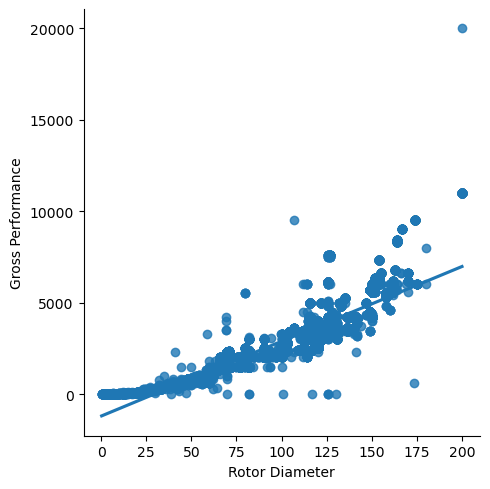

In [61]:
# Gross Performance / Rotor Diameter
scatter_RD = sns.lmplot(data=df_gwt, x="Rotor Diameter", y="Gross Performance")

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


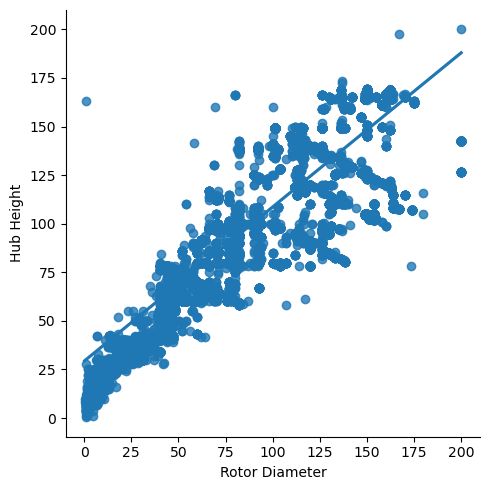

In [64]:
#Rotor Diameter / Hub Height
scatter_RD = sns.lmplot(data=df_gwt, x="Rotor Diameter", y="Hub Height")

### Hypothesis

As the size of the turbine increase so does its power out put, Hub Heigh, and Net rated Performance.

# Reshaping the variables into Numpys

## Gross Perfomance / Net Rated Power

In [67]:
#Reshape the variables into NumPy arrays and put them into separate objects
X = df_gwt['Gross Performance'].values.reshape(-1,1)
y = df_gwt['Net Rated Power'].values.reshape(-1,1)

In [68]:
X

array([[3000.],
       [3000.],
       [3000.],
       ...,
       [4500.],
       [4500.],
       [ 600.]])

In [69]:
y

array([[3000.],
       [3000.],
       [3000.],
       ...,
       [4500.],
       [4500.],
       [ 600.]])

In [70]:
# Splitting the two into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [71]:
# Created a regression object
regression = LinearRegression()

In [72]:
#fitting the object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [73]:
#Predict th values of y using X
y_predicted = regression.predict(X_test)

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

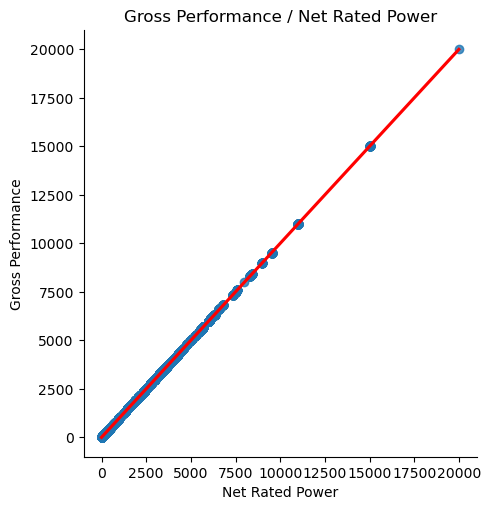

In [85]:
plt.figure(figsize=(10, 20))
sns.lmplot(x='Net Rated Power', y='Gross Performance', data=df_gwt, line_kws={'color': 'red'}) 
plt.title('Gross Performance / Net Rated Power')
plt.show()

In [83]:
# Predicting the value of y using X_test
y_predicted = regression.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_predicted, squared=False)

# Calculating R-squared score
r2 = r2_score(y_test, y_predicted)

# Printing the slope (coefficient)
print('Slope (Coefficient):', regression.coef_)

# Printing the mean squared error (RMSE)
formatted_rmse = format(rmse, '.15f')

print('Root Mean Squared Error:', formatted_rmse)

# Printing the R-squared score
print('R2 Score:', r2)

Slope (Coefficient): [[1.00]]
Root Mean Squared Error: 0.000000000003945
R2 Score: 1.0


In [84]:
#creating a dataframe comparing the real and the predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,560.0,560.0
1,2000.0,2000.0
2,2050.0,2050.0
3,5700.0,5700.0
4,2300.0,2300.0
5,4200.0,4200.0
6,2300.0,2300.0
7,3370.0,3370.0
8,3075.0,3075.0
9,5700.0,5700.0


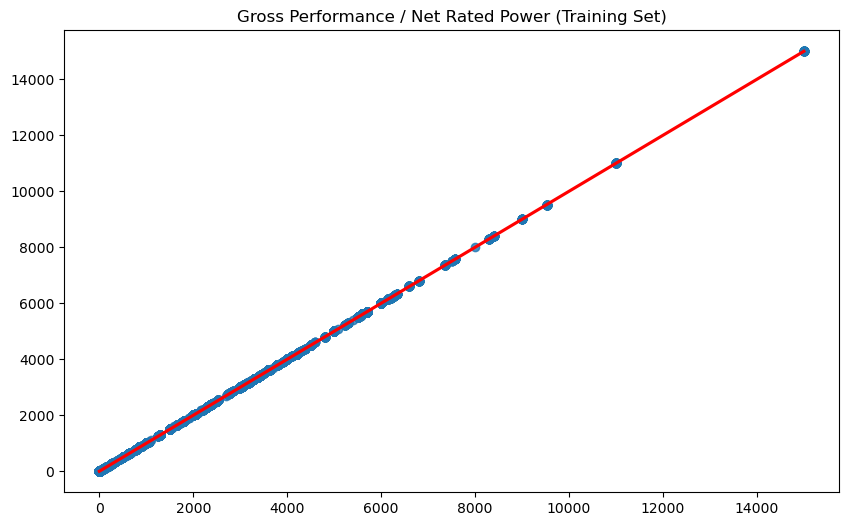

In [88]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train.squeeze(), y=y_train.squeeze(), line_kws={'color': 'red'})
plt.title('Gross Performance / Net Rated Power (Training Set)')
plt.show()

### Conclusion
Given that both Gross Performance and Net Rated Power are the same it is no surprise that we have these results. in the previous tests with correlation we had a 1 to 1 correlation. now that we know the modelling works lets get into the other variables.

## Gross Perfomance / Hub Height

In [113]:
#we are going to have to filter out the nan
df_gwt_HH = df_gwt.dropna(subset=['Hub Height'])

In [114]:
#Reshape the variables into NumPy arrays and put them into separate objects
X = df_gwt_HH['Gross Performance'].values.reshape(-1,1)
y = df_gwt_HH['Hub Height'].values.reshape(-1,1)

In [115]:
X

array([[3000.00],
       [3000.00],
       [3000.00],
       ...,
       [4500.00],
       [4500.00],
       [600.00]])

In [116]:
y

array([[149.08],
       [135.40],
       [149.08],
       ...,
       [164.00],
       [164.00],
       [50.00]])

In [117]:
# Splitting the two into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [118]:
# Created a regression object
regression = LinearRegression()

In [119]:
#fitting the object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [120]:
#Predict th values of y using X
y_predicted = regression.predict(X_test)

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

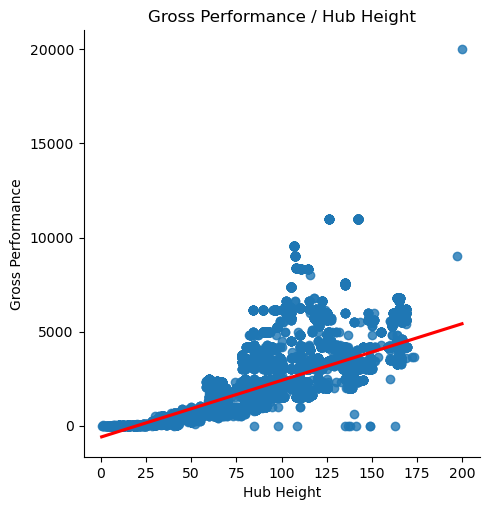

In [127]:
plt.figure(figsize=(10, 20))
sns.lmplot(x='Hub Height', y='Gross Performance', data=df_gwt_HH, line_kws={'color': 'red'}) 
plt.title('Gross Performance / Hub Height')
plt.show()

In [122]:
# Predicting the value of y using X_test
y_predicted = regression.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_predicted, squared=False)

# Calculating R-squared score
r2 = r2_score(y_test, y_predicted)

# Printing the slope (coefficient)
print('Slope (Coefficient):', regression.coef_)

# Printing the mean squared error (RMSE)
formatted_rmse = format(rmse, '.15f')

print('Root Mean Squared Error:', formatted_rmse)

# Printing the R-squared score
print('R2 Score:', r2)

Slope (Coefficient): [[0.01]]
Root Mean Squared Error: 25.808747492106690
R2 Score: 0.4474894780575812


In [123]:
#creating a dataframe comparing the real and the predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,94.00,86.208237
1,64.00,97.770254
2,84.00,108.970957
3,75.00,75.368847
4,115.00,110.777522
5,85.00,83.317733
6,164.00,112.222774
7,65.00,73.200969
8,100.00,93.434497
9,117.00,114.390652


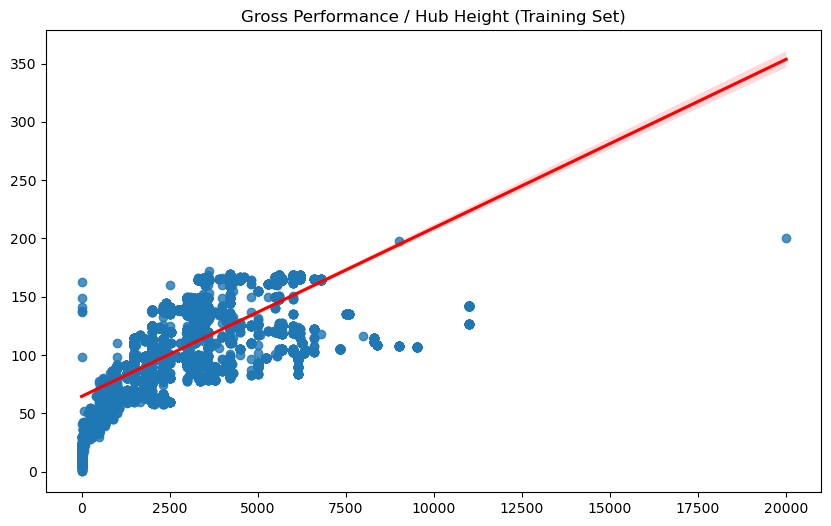

In [124]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train.squeeze(), y=y_train.squeeze(), line_kws={'color': 'red'})
plt.title('Gross Performance / Hub Height (Training Set)')
plt.show()

### Conclusion

Slope: from what we can see the slope is at 0.01 this suggests that for every 1 unit of Hub Height or every meter of height gained we should see and increase of 0.01 units of power increased.

RMSE: this shows us that the average deviation from the model is 25.8087, given the size of the data set here this isnt too bad.

R2 Score: with this kind of variance aproximately 44.75% these are not good results.

I would say that the results for this test were not very successfull

## Gross Perfomance / Rotor Diameter

In [135]:
#we are going to have to filter out the nan
df_gwt_RD = df_gwt.dropna(subset=['Rotor Diameter'])

In [142]:
#Reshape the variables into NumPy arrays and put them into separate objects
X = df_gwt_RD['Gross Performance'].values.reshape(-1,1)
y = df_gwt_RD['Rotor Diameter'].values.reshape(-1,1)

In [143]:
X

array([[3000.00],
       [3000.00],
       [3000.00],
       ...,
       [4500.00],
       [4500.00],
       [600.00]])

In [144]:
y

array([[115.71],
       [115.70],
       [115.71],
       ...,
       [149.10],
       [149.10],
       [43.00]])

In [145]:
# Splitting the two into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [146]:
# Created a regression object
regression = LinearRegression()

In [147]:
#fitting the object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [148]:
#Predict th values of y using X
y_predicted = regression.predict(X_test)

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

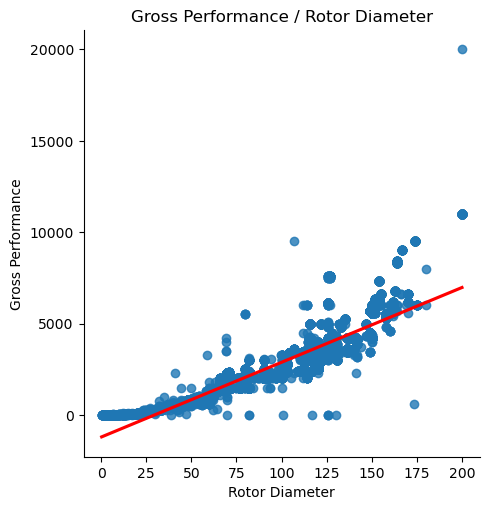

In [149]:
plt.figure(figsize=(10, 20))
sns.lmplot(x='Rotor Diameter', y='Gross Performance', data=df_gwt_RD, line_kws={'color': 'red'}) 
plt.title('Gross Performance / Rotor Diameter')
plt.show()

In [150]:
# Predicting the value of y using X_test
y_predicted = regression.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_predicted, squared=False)

# Calculating R-squared score
r2 = r2_score(y_test, y_predicted)

# Printing the slope (coefficient)
print('Slope (Coefficient):', regression.coef_)

# Printing the mean squared error (RMSE)
formatted_rmse = format(rmse, '.15f')

print('Root Mean Squared Error:', formatted_rmse)

# Printing the R-squared score
print('R2 Score:', r2)

Slope (Coefficient): [[0.02]]
Root Mean Squared Error: 13.963400629689758
R2 Score: 0.8477737271111456


In [151]:
#creating a dataframe comparing the real and the predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,70.00,69.362136
1,77.00,69.362136
2,114.00,104.014661
3,44.00,50.687123
4,174.00,235.881007
5,82.00,85.962148
6,58.00,55.874626
7,53.00,54.837126
8,52.20,56.912127
9,120.00,90.734652


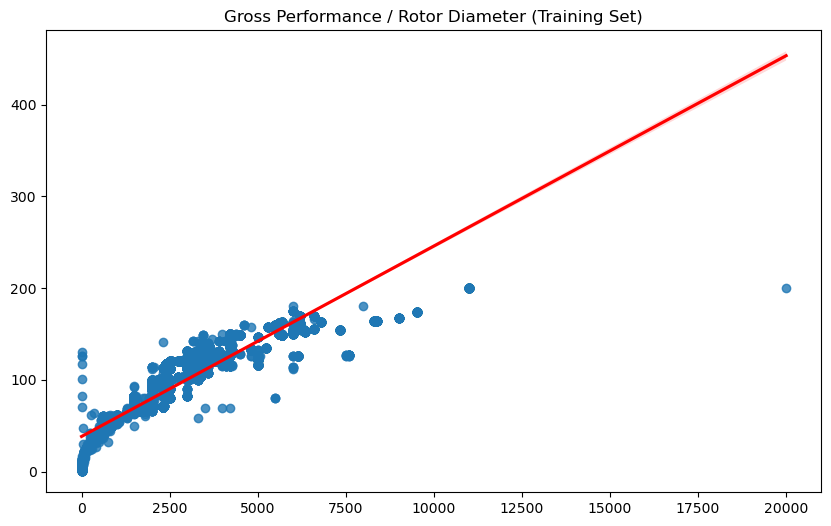

In [152]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train.squeeze(), y=y_train.squeeze(), line_kws={'color': 'red'})
plt.title('Gross Performance / Rotor Diameter (Training Set)')
plt.show()

### Conclusion

Slope: from what we can see the slope is at 0.02 this suggests that for every 1 unit of Rotor Diameter or every meter of length gained we should see and increase of 0.02 units of power increased.

RMSE: this shows us that the average deviation from the model is 13.9634, given the size of the data set here this isnt too bad. there isnt too much deviation.

R2 Score: with this kind of variance aproximately 84.78% this suggests a pretty good fit.
this model hasnt done too badly.

these results are closer to what we are looking for but lets see if we find a better fit on our last test.

## Hub Height / Rotor Diameter

In [158]:
#we are going to have to filter out the nan
df_gwt_RDHH = df_gwt.dropna(subset=['Rotor Diameter','Hub Height'])

In [159]:
#Reshape the variables into NumPy arrays and put them into separate objects
X = df_gwt_RDHH['Hub Height'].values.reshape(-1,1)
y = df_gwt_RDHH['Rotor Diameter'].values.reshape(-1,1)

In [160]:
X

array([[149.08],
       [135.40],
       [149.08],
       ...,
       [164.00],
       [164.00],
       [50.00]])

In [161]:
y

array([[115.71],
       [115.70],
       [115.71],
       ...,
       [149.10],
       [149.10],
       [43.00]])

In [162]:
# Splitting the two into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [163]:
# Created a regression object
regression = LinearRegression()

In [164]:
#fitting the object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [165]:
#Predict th values of y using X
y_predicted = regression.predict(X_test)

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

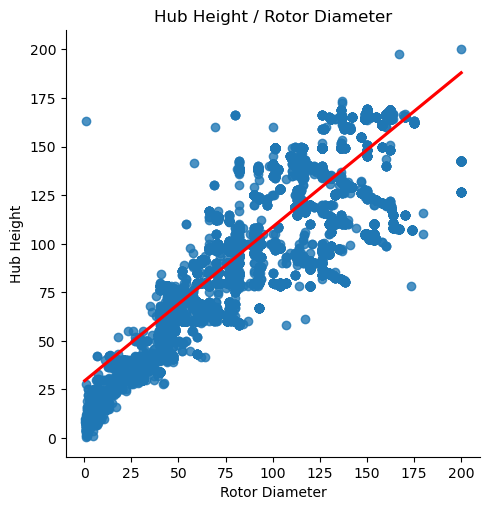

In [166]:
plt.figure(figsize=(10, 20))
sns.lmplot(x='Rotor Diameter', y='Hub Height', data=df_gwt_RDHH, line_kws={'color': 'red'}) 
plt.title('Hub Height / Rotor Diameter')
plt.show()

In [167]:
# Predicting the value of y using X_test
y_predicted = regression.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_predicted, squared=False)

# Calculating R-squared score
r2 = r2_score(y_test, y_predicted)

# Printing the slope (coefficient)
print('Slope (Coefficient):', regression.coef_)

# Printing the mean squared error (RMSE)
formatted_rmse = format(rmse, '.15f')

print('Root Mean Squared Error:', formatted_rmse)

# Printing the R-squared score
print('R2 Score:', r2)

Slope (Coefficient): [[0.82]]
Root Mean Squared Error: 20.554510419573766
R2 Score: 0.6644214310361702


In [168]:
#creating a dataframe comparing the real and the predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,115.0,128.935564
1,92.0,91.900553
2,70.5,58.980543
3,80.0,55.688542
4,90.0,84.493551
5,71.0,59.803543
6,116.8,116.590561
7,52.0,57.334543
8,44.0,51.573541
9,82.0,70.774137


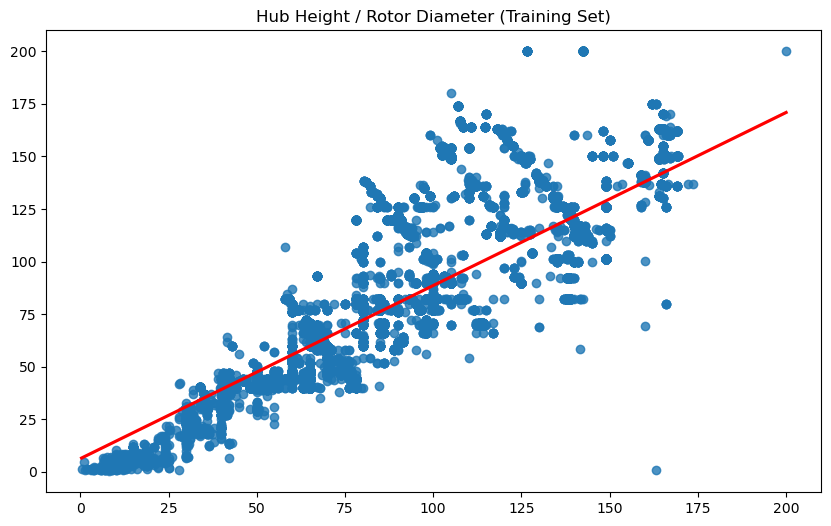

In [169]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train.squeeze(), y=y_train.squeeze(), line_kws={'color': 'red'})
plt.title('Hub Height / Rotor Diameter (Training Set)')
plt.show()

### Conclusion

Slope: from what we can see the slope is at 0.82 this suggests that for every 1 unit of Rotor Diameter or every meter of length gained we should see and increase of 0.82 units of Hub Height.

RMSE: this shows us that the average deviation from the model is 20.5545, given the size of the data set here this isnt too bad.

R2 Score: with this kind of variance aproximately 66.44% this was not such a good fit. the variance is quite high i would have expected better results as we had such a close correlation in the previous testing.

# Overview

in all tests we had positive relationships, which does support our earlier findings that as turbines get larger their blades get longer and thier power out puts increase.

using my what i know about the industry i must say that these reults seem very accurate. towers can be taller because of trees and the rotor diameter stays the same. again some turbines have really long blades with low power out puts while others have high outputs with short blades although this is greatly down to the manufacturer and in most cases the exception rather than the rule.